### Import required libraries

In [1]:
import pandas as pd
import numpy as np
from random import randrange
from csv import reader
from scipy import stats

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Test set doesn't have survived column and rest all columns are same as training data

In [4]:
print(f"Training set data: {train_data.shape}")
print(f"Testing set data: {test_data.shape}")

Training set data: (891, 12)
Testing set data: (418, 11)


### Data exploration and visualization

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isna().sum()  #check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing values are found in features Age, Cabin and embarked

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def passenger_status_in_class(klass, status):
    class_count  = 0
    status_count = 0
    
    for stat, kls in zip(train_data.Survived, train_data.Pclass):
        if kls == klass:  # the class that we want
            class_count += 1
            
            if stat == status:  # survived or dead in that class
                status_count += 1
                
    return (class_count, status_count)

In [9]:
count_1st, survived_1st = passenger_status_in_class(1, 1)
count_2nd, survived_2nd = passenger_status_in_class(2, 1)
count_3rd, survived_3rd = passenger_status_in_class(3, 1)

count_1st, dead_1st = passenger_status_in_class(1, 0)
count_2nd, dead_2nd = passenger_status_in_class(2, 0)
count_3rd, dead_3rd = passenger_status_in_class(3, 0)

total_passengers = len(train_data.Survived)
total_survived   = survived_1st + survived_2nd + survived_3rd
total_dead  = dead_1st + dead_2nd + dead_3rd

print(f'The total number of passengers are: {total_passengers}.' +
      f'Among them, {total_survived} survived = {int(100*total_survived/total_passengers)}% ' +
      f'and {total_dead} dead = {int(100*total_dead/total_passengers)}%')
print()

pct_survived_1st = int(100*survived_1st/count_1st)
pct_survived_2nd = int(100*survived_2nd/count_2nd)
pct_survived_3rd = int(100*survived_3rd/count_3rd)

print(f'The total passengers in first class are {count_1st} , ' +
      f'only {survived_1st} survived = {pct_survived_1st}%')
print(f'The total passengers in second class are {count_2nd}, ' +
      f'only {survived_2nd} survived = {pct_survived_2nd}%')
print(f'The total passengers in third class {count_3rd} are, ' +
      f'only {survived_3rd} survived = {pct_survived_3rd}%')

The total number of passengers are: 891.Among them, 342 survived = 38% and 549 dead = 61%

The total passengers in first class are 216 , only 136 survived = 62%
The total passengers in second class are 184, only 87 survived = 47%
The total passengers in third class 491 are, only 119 survived = 24%


> 1. Among 891 passengers, 38% are survived and rest 61% are dead.  
> 2. Passengers from first class has more survival rate i.e. 62% compared to other class passengers.

In [10]:
cont_features = train_data[['Survived','Pclass','Age','SibSp','Parch','Fare']]
cat_features = train_data[['Sex','Ticket','Cabin','Embarked']]

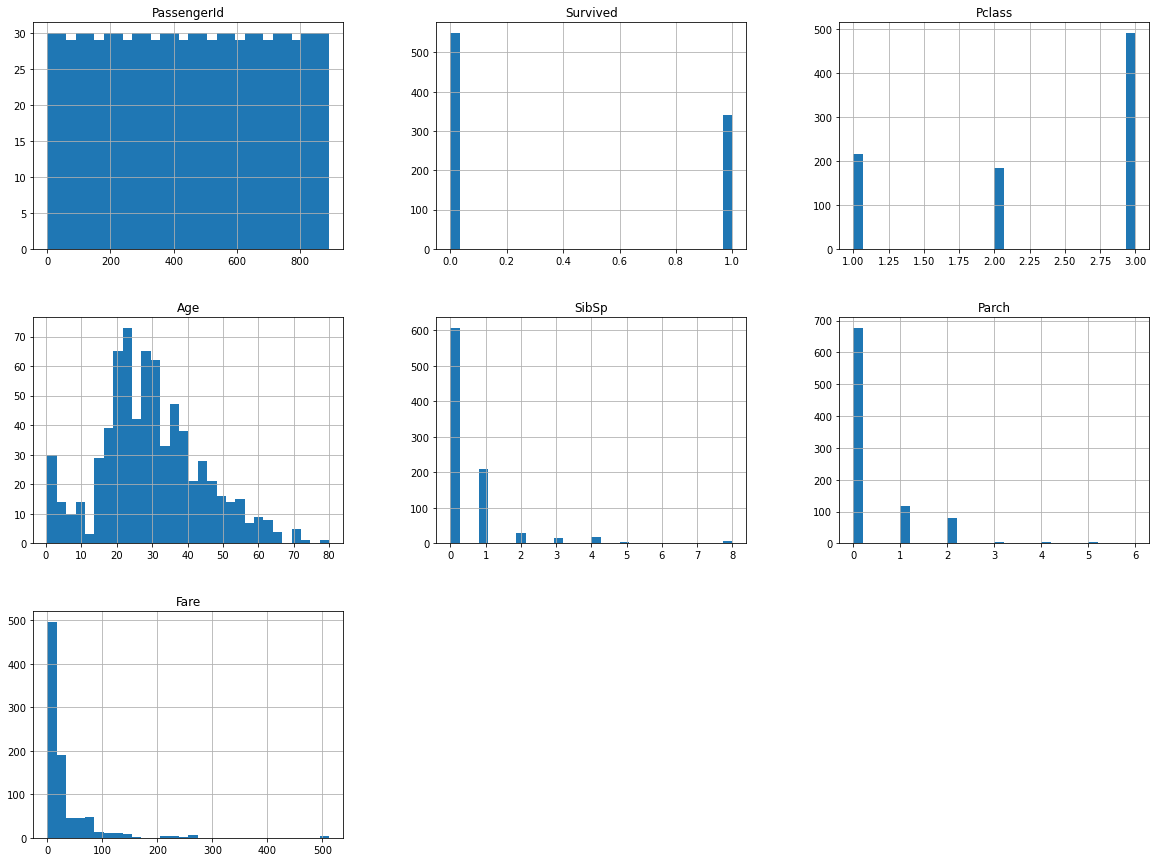

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data.hist(bins=30, figsize=(20,15))
plt.show()

### The histogram of Age follows normal distribution, Fare has exponential distribution

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

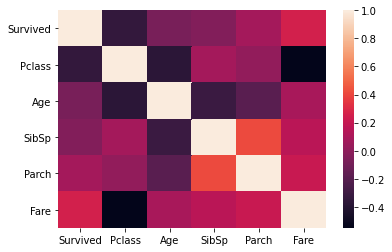

In [12]:
# Compute the correlation matrix
print(train_data.iloc[:,1:].corr())
sns.heatmap(train_data.iloc[:,1:].corr())

### The correlation matrix shows features Pclass and Fare has strong correlation with target variable Survived 

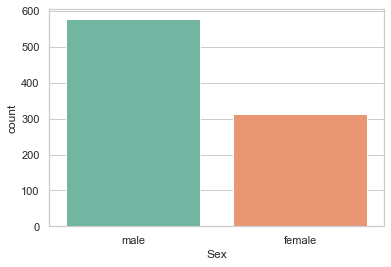

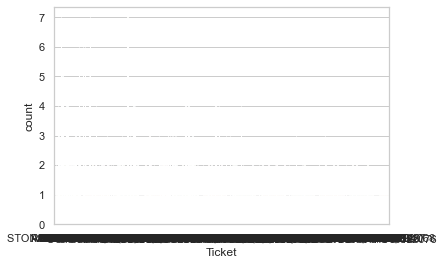

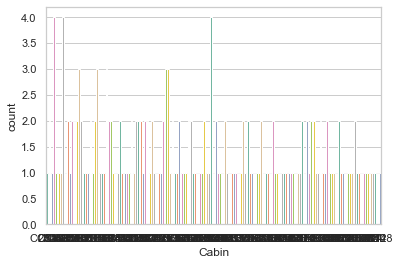

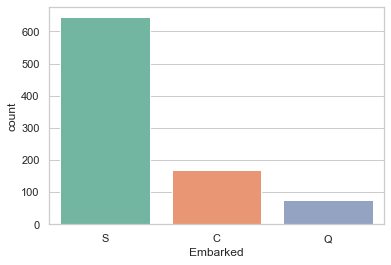

In [13]:
sns.set(style="whitegrid")
for i,cat in enumerate(cat_features):
    plt.figure(i)
    sns.countplot(x=cat,data=train_data,palette="Set2")

### The charts of tickets and cabins are clumsy and not clear

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

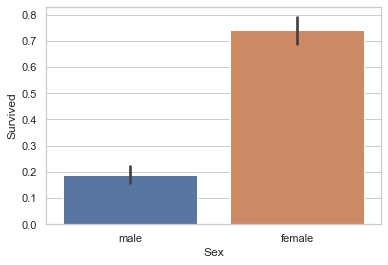

In [14]:
sns.barplot(data=train_data, x='Sex', y='Survived')

### The survival rate of female is more when compared to male passengers

### Feature Engineering

### Merged both train and test data to perform feature engineering

In [15]:
train_data['source']='train'
test_data['source']='test'
tr_data= train_data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]]
data= pd.concat([tr_data,test_data]) 

In [16]:
data['source'].value_counts()

train    891
test     418
Name: source, dtype: int64

## Family

#### Added both SibSp and Parch to calculate the family size of passengers

In [17]:
data['Family_size']= data['SibSp']+ data['Parch']+1 
#Labelled the single passengers as ‘0’, small family with range 2 to 4 as ‘1’ and rest all passengers i.e. ‘Large Family’ as ‘2’.
data['Family_size']=data['Family_size'].map(lambda fs:0 if fs==1 else 1 if 2<= fs <=4 else 2 )

In [18]:
data['IsAlone']=0
data.loc[data['Family_size']==0,'IsAlone']=1

### Name

In [19]:
def extract_title():
    titles=set()
    for each_name in data['Name']:
        titles.add(each_name.split(',')[1].split('.')[0].strip())
    return titles

In [20]:
titles_list=extract_title()
print(titles_list)  # List of titles found in passengers information

{'Master', 'Ms', 'Rev', 'Mrs', 'the Countess', 'Capt', 'Don', 'Miss', 'Mlle', 'Mr', 'Lady', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Major', 'Col', 'Dr'}


In [21]:
data['Title']=data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [22]:
#replacing all titles with mr, mrs, miss, master
def modify_titles(df):
    text=df['Title']
    if text in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir','Dona']:
        return 'Mr'
    elif text in ['the Countess', 'Mme','Mrs','Lady']:
        return 'Mrs'
    elif text in ['Mlle', 'Ms','Miss']:
        return 'Miss'
    elif text =='Dr':
        if df['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return text
data['Title']=data.apply(modify_titles,axis=1)

In [23]:
data['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

### Age

In [26]:
group=data.groupby(['Pclass','Sex','Title']).median()
final_group=group.reset_index()[['Pclass','Sex','Title','Age']]
final_group.head()

,Pclass,Sex,Title,Age
0,1,female,Miss,30.0
1,1,female,Mr,39.0
2,1,female,Mrs,45.0
3,1,male,Master,6.0
4,1,male,Mr,42.0


In [27]:
# Function to impute missing values
def fill_missing_age(item):
    query= ((final_group['Sex'] == item['Sex']) & (final_group['Title'] == item['Title']) & (final_group['Pclass'] == item['Pclass'])) 
    if np.isnan(final_group[query]['Age'].values[0]):
        pass
    return final_group[query]['Age'].values[0]


In [28]:
data['Age'] = data.apply(lambda record: fill_missing_age(record) if np.isnan(record['Age']) else record['Age'], axis=1)

### Cabin

In [29]:
data['Cabin']=data['Cabin'].map(lambda x:0 if type(x)==float else 1)
data= pd.concat([data, pd.get_dummies(data['Cabin'], prefix = 'Cabin')],axis=1)
data.drop('Cabin',axis=1, inplace=True)

### Embarked

In [30]:
train_data['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
data['Embarked']=data['Embarked'].fillna('S') # Impute the missing values with most frequent value in training set
data= pd.concat([data, pd.get_dummies(data['Embarked'], prefix = 'Embarked')],axis=1) # One hot encoding

In [32]:
data.drop('Embarked',axis=1, inplace=True)

### Fare

In [33]:
data['Fare']= data['Fare'].fillna(train_data['Fare'].mean())  #Impute the missing values with mean of train data of Fare
data['Fare_cat']=pd.qcut(data.Fare,q=4,labels=False) # converted Fare to categorical variable

### Ticket

In [34]:
data['numeric_ticket'] = data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

### Sex

In [35]:
data['Sex'] = data['Sex'].replace(['female','male'],[0,1])
data= pd.concat([data, pd.get_dummies(data['Title'], prefix = 'Title')],axis=1) # performed onehot encoding

### Drop unncessary columns

In [36]:
data.drop(['PassengerId','Name','Title','Fare','Ticket','SibSp','Parch','Age','Family_size','Fare_cat'],axis=1, inplace=True)

### Data modeling and validation 

### Slice the train and test data with index and drop the source column

In [37]:
train = data[:891].copy()
test = data[891:].copy()
train.shape,test.shape

((891, 14), (418, 14))

In [38]:
train.drop('source',axis=1,inplace=True)
test.drop('source',axis=1,inplace=True)

In [39]:
y=train_data.iloc[:,[1]]
train=pd.concat([train,y], axis=1) # Concatenate the target variable to training data

In [40]:
train.head()

,Pclass,Sex,IsAlone,Cabin_0,Cabin_1,Embarked_C,Embarked_Q,Embarked_S,numeric_ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived
0,3,1,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,0,1,1
4,3,1,1,1,0,0,0,1,1,0,0,1,0,0


### KNN Implementation

In [41]:
# Load train CSV file
def readfile(fname):
    data = []
    with open(fname, 'r') as fileobj:
        csv_reader = reader(fileobj)
        for line in csv_reader:
            if not line:
                continue
            data.append(line)
    return data


# Convert string column to float
def string_to_float(data, column):
    for line in data:
        line[column] = float(line[column].strip())


# Function to split the training dataset into k-1 training folds and one testing fold
def cross_val_split(data, k_folds):
    data_split = []
    data_dummy = list(data)
    fold_size = int(len(data) / k_folds)
    for _ in range(k_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(data_dummy))
            fold.append(data_dummy.pop(index))
        data_split.append(fold)
    return data_split

# Calculate the accuracy score of predicted and actual labels
def accuracy_score(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split, model training and measuring accuracy perecntage
def evaluate_algorithm(data,model,num_neighbors,k_folds=5):
    folds = cross_val_split(data, k_folds)
    scores = []
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = []
        for line in fold:
            line_copy = list(line)
            test_set.append(line_copy)
            line_copy[-1] = None
        predicted = model(train_set, test_set,num_neighbors)
        actual = [line[-1] for line in fold]
        accuracy = accuracy_score(actual, predicted)
        scores.append(accuracy)
    return scores

# Calculate the Euclidean distance between train and test data records
def euclidean_distance(record1, record2):
    distance = 0.0
    for i in range(len(record1)-1):
        distance += (record1[i] - record2[i])**2
    return np.sqrt(distance)

# Locate the most similar neighbors
def get_similar_neighbors(train, test_row, num_neighbors):
    #sort the training records by their distance to the test record and get the k nearest 
    index =np.argsort([euclidean_distance(test_row, record) for record in train])[:num_neighbors]
    # Get the target labels of nearest neighbours 
    neighbors = np.array([train[i] for i in index])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_similar_neighbors(train, test_row, num_neighbors)
    output = [row[-1] for row in neighbors]
    prediction = max(set(output), key=output.count)  
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    result = [predict_classification(train,row, num_neighbors) for row in test]
    return result

In [42]:
#convert train dataframe to csv 
train.to_csv(r'sampletrain.csv',header=False,index=False)  


filename='sampletrain.csv'
titanic_train = readfile(filename)

#convert string columns to float
for i in range(len(titanic_train[0])-1):
    string_to_float(titanic_train, i)

In [43]:
# call algorithm to train model
num_neighbors = 7   #parameter to tune
scores = evaluate_algorithm(titanic_train, k_nearest_neighbors,num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [80.33707865168539, 83.14606741573034, 83.70786516853933, 74.71910112359551, 80.33707865168539]
Mean Accuracy: 80.449%


In [44]:
#convert test dataframe to csv 
test_sample=test.to_csv(r'sampletest.csv',header=False,index=False)   #convert test dataframe to csv

filename='sampletest.csv'
test_sample= readfile(filename)

for i in range(len(test_sample[0])-1):
    string_to_float(test_sample, i)

# Run the model using test data    
y_pred=k_nearest_neighbors(titanic_train,test_sample,num_neighbors)

In [45]:
final_data = {'PassengerId': test_data.PassengerId, 'Survived': y_pred}
final = pd.DataFrame(data=final_data)
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [46]:
final['Survived'].value_counts()

0    281
1    137
Name: Survived, dtype: int64

In [47]:
final.to_csv('submission.csv', index =False)

References:

1. https://towardsdatascience.com/kaggle-titanic-machine-learning-model-top-7-fa4523b7c40
2. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
    